In [1]:
import pandas as pd
import numpy as np
from numpy import array
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import RepeatVector
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from matplotlib import pyplot as plt
from itertools import chain

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/scalation/data/master/COVID/CLEANED_35.csv')
date = df['date'].tail(391-44)
deaths = df['deathIncrease'].tail(391-44)
sequence=list(deaths)

In [3]:
def split_sequence(data,steps_in,steps_out):
    X,y=list(),list()
    for i in range(len(data)):
        seq_end=i+steps_in
        end_out=seq_end+steps_out
        if end_out > len(data):
            break
        seq_x, seq_y=data[i:seq_end], data[seq_end:end_out]
        X.append(seq_x)
        y.append(seq_y)
    return array(X),array(y)

In [4]:
steps_in, steps_out = 21 , 14
X, y=split_sequence(sequence,steps_in,steps_out)

In [5]:
features=1
X=X.reshape(X.shape[0],X.shape[1],features)
print(X.shape, y.shape)

(313, 21, 1) (313, 14)


In [19]:
#Model after tuning
model = Sequential()
model.add(LSTM(96,activation='relu', input_shape=(steps_in,features)))
model.add(RepeatVector(steps_out))
model.add(LSTM(224, activation='relu'))
model.add(RepeatVector(steps_out))
model.add(LSTM(224, activation='relu'))
model.add(Dense(steps_out))
model.compile(optimizer='adam',loss='mape')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 96)                37632     
_________________________________________________________________
repeat_vector_8 (RepeatVecto (None, 14, 96)            0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 224)               287616    
_________________________________________________________________
repeat_vector_9 (RepeatVecto (None, 14, 224)           0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 224)               402304    
_________________________________________________________________
dense_4 (Dense)              (None, 14)                3150      
Total params: 730,702
Trainable params: 730,702
Non-trainable params: 0
________________________________________________

m = 313, tr_size = 187, te_size = 126, kt = 126, h = 10
(126, 21, 1) (126, 14) (187, 21, 1) (187, 14)


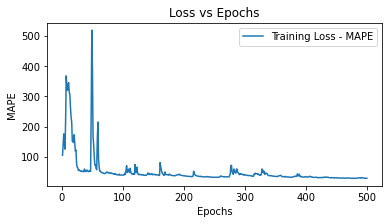

Min Training Loss = 28.667818069458008 at Epoch 478
h=1  ->  smape= 51.60
h=2  ->  smape= 49.37
h=3  ->  smape= 40.34
h=4  ->  smape= 40.72
h=5  ->  smape= 36.04
h=6  ->  smape= 32.50
h=7  ->  smape= 41.91
h=8  ->  smape= 53.56
h=9  ->  smape= 58.54
h=10 ->  smape= 50.57
h=11  ->  smape= 49.02
h=12  ->  smape= 44.71
h=13  ->  smape= 41.67
h=14  ->  smape= 56.66
rSq =['0.1379', '0.1945', '0.4168', '0.4825', '0.5365', '0.5534', '0.3592', '0.0614', '-0.1254', '0.0666', '0.1853', '0.2891', '0.3573', '0.0153'] mape =['41.24', '40.59', '36.16', '42.93', '36.00', '28.69', '33.23', '41.59', '43.76', '39.34', '42.27', '37.72', '33.18', '42.50'] smape =['51.60', '49.37', '40.34', '40.72', '36.04', '32.50', '41.91', '53.56', '58.54', '50.57', '49.02', '44.71', '41.67', '56.66'] mse =['1096948.31', '1011563.02', '746793.99', '682743.24', '626690.68', '610483.51', '877630.22', '1268010.98', '1497512.86', '1250986.52', '1107681.43', '1020577.90', '928957.20', '1418945.78'] rmse =['1047.35', '1005.76

In [20]:
rSq, mape, smape, mse, rmse, sse, sst, beats, prediction, y_e = rollingValidate(model, True, X, y, -1, 10, 0, 500, 16, True, True, True)
print("rSq ="+str(rSq)+ " mape ="+str(mape) +" smape ="+ str(smape)+" mse ="+ str(mse) +" rmse ="+ str(rmse)+" sse ="+ str(sse)+ " sst ="+ str(sst))

In [22]:
#model before tuning
amodel = Sequential()
amodel.add(LSTM(100,activation='relu', input_shape=(steps_in,features)))
amodel.add(RepeatVector(steps_out))
amodel.add(LSTM(50, activation='relu'))
amodel.add(RepeatVector(steps_out))
amodel.add(LSTM(50, activation='relu'))
amodel.add(Dense(steps_out))
amodel.compile(optimizer='adam',loss='mape')
amodel.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 100)               40800     
_________________________________________________________________
repeat_vector_12 (RepeatVect (None, 14, 100)           0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 50)                30200     
_________________________________________________________________
repeat_vector_13 (RepeatVect (None, 14, 50)            0         
_________________________________________________________________
lstm_20 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_6 (Dense)              (None, 14)                714       
Total params: 91,914
Trainable params: 91,914
Non-trainable params: 0
__________________________________________________

m = 313, tr_size = 187, te_size = 126, kt = 126, h = 10
(126, 21, 1) (126, 14) (187, 21, 1) (187, 14)


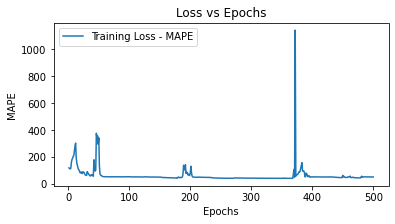

Min Training Loss = 40.6359977722168 at Epoch 363
h=1  ->  smape= 50.86
h=2  ->  smape= 52.57
h=3  ->  smape= 62.85
h=4  ->  smape= 64.32
h=5  ->  smape= 66.23
h=6  ->  smape= 64.00
h=7  ->  smape= 57.15
h=8  ->  smape= 69.20
h=9  ->  smape= 68.55
h=10 ->  smape= 73.04
h=11  ->  smape= 77.64
h=12  ->  smape= 84.71
h=13  ->  smape= 78.20
h=14  ->  smape= 80.92
rSq =['0.1411', '0.1249', '-0.1114', '-0.1971', '-0.2524', '-0.2030', '-0.0322', '-0.2813', '-0.2774', '-0.4270', '-0.6050', '-0.7486', '-0.5923', '-0.6192'] mape =['39.36', '40.91', '46.60', '47.21', '48.16', '46.62', '42.61', '49.48', '48.99', '51.08', '52.83', '56.65', '53.63', '55.21'] smape =['50.86', '52.57', '62.85', '64.32', '66.23', '64.00', '57.15', '69.20', '68.55', '73.04', '77.64', '84.71', '78.20', '80.92'] mse =['1092867.79', '1098949.08', '1423038.64', '1579389.86', '1693329.74', '1644254.22', '1413755.50', '1730890.40', '1699835.74', '1912513.42', '2182118.68', '2510252.79', '2301375.45', '2333100.22'] rmse =['104

In [23]:
rSq, mape, smape, mse, rmse, sse, sst, beats, prediction, y_e = rollingValidate(amodel, True, X, y, -1, 10, 0, 500, 16, True, True, True)
print("rSq ="+str(rSq)+ " mape ="+str(mape) +" smape ="+ str(smape)+" mse ="+ str(mse) +" rmse ="+ str(rmse)+" sse ="+ str(sse)+ " sst ="+ str(sst))

In [7]:
def train50(X,y):
    TR_RATIO = 0.5
    m = y.shape[0]
    tr_size = int(m * TR_RATIO)
    te_size = int(m - tr_size)
    te = int(tr_size)
   # if kt < 0: kt = te_size
    #print("m = "+str(m)+", tr_size = "+str(tr_size)+", te_size = "+str(te_size))
    
    (x_e, y_e, x_r, y_r) = chopr (X, y, te, te_size, tr_size)
    return x_e, y_e, x_r, y_r

In [8]:
def plotHistory(fit_history,ls="MAPE"):
    #Get training loss
    loss = fit_history.history['loss']
    # val_loss = fit_history.history['val_loss']

    # Create count of the number of epochs
    epoch_count = range(1, len(loss) + 1)

#     # Visualize loss history - Plotting Loss vs Number of Epochs during training
    plt.figure(num=0,figsize=(6,3))
    plt.plot(epoch_count, loss)
    # plt.plot(val_loss)
    plt.legend(['Training Loss - '+str(ls), 'Validation Loss - '+str(ls)])
    plt.xlabel('Epochs')
    plt.ylabel(ls)
    plt.title("Loss vs Epochs")
    plt.show()

#     print("_________________________________________________________________________________________")
    print("Min Training Loss = " + str(np.min(loss)) + " ",end='')
    print("at Epoch " + str(np.argmin(loss) + 1))
    # print("Min Validation Loss = " + str(np.min(val_loss)) + " ",end='')
    # print("at Epoch " + str(np.argmin(val_loss) + 1))
#     print("__________________________________________________________________________________________")

In [9]:
def eval(y,yp):
    # print(y)
    # print(yp)
    import math
    roundTo = 5
    m = y.shape[0]
    # print(m)
    e = np.array(y - yp)

    # print("m")
    # print(e)
    yt = np.array(y - y.mean())
    sse = e.dot(e)
    sst = yt.dot(yt)
    rSq = round((1 - ((sse)/(sst))),roundTo)
    mape = round(((np.absolute(e)/np.absolute(y)).sum())*100/m,roundTo)
    t = (np.absolute(e)/(np.absolute(y)+np.absolute(yp)))
    #print(t.sum()*200/m)
    smape = round(((np.absolute(e)/(np.absolute(y)+np.absolute(yp))).sum())*200/m,roundTo)
    # smape  = 200 * (e.abs / (yy.abs + yp.abs)).sum / m
    mse = round((sse/m),roundTo)
    rmse = round(math.sqrt(mse),roundTo)
#     return(rSq,mape,mse,rmse,sse,sst)
    return(format(rSq,'.4f'),format(mape,'.2f'),format(smape,'.2f'),format(mse,'.2f'),format(rmse,'.2f'),format(sse,'.2f'),format(sst,'.2f'))

In [10]:
def rollingValidate(model, train, x, y, kt, h, callbk, nEpoch, nBatch, plot, p1, p2):
    TR_RATIO = 0.6
    m = y.shape[0]
    tr_size = int(m * TR_RATIO)
    te_size = int(m - tr_size)
    te = int(tr_size)
    if kt < 0: kt = te_size
    print("m = "+str(m)+", tr_size = "+str(tr_size)+", te_size = "+str(te_size)+", kt = "+str(kt)+", h = "+str(h))
    
    (x_e, y_e, x_r, y_r) = chopr (x, y, te, te_size, tr_size)
    print(x_e.shape, y_e.shape, x_r.shape, y_r.shape)
    # print(type(y_r))
    # print(y_r.index)
    
    # print(type(y_e))
    # print(y_e.index)
    #print(y_e.shape)
    #y_e = np.array(y_e)
    #print(y_e)
   # smapearr = [x for x in range(10,24)]
   # for h in range(1,15):
   #     yr =  y_r[h-1]
   #     inp = y_e[h-1].tolist()
   #     yrw = inp[:-h]
       
   #     for i in range(h):
   #         yrw.insert(i,inp[i])
   #     yrw = np.array(yrw)
   #     rSqr, maper, smaper, mser, rmser, sser, sstr = eval(y_e[h-1],yrw)
   #     smapearr[h-1] = smaper
#     x_r = x_r[1000:]
#     y_r = y_r[1000:]
#     print("Training shape"+str(x_r.shape))
#     print("Training shape"+str(y_r.shape))
#     print("Testing shape"+str(x_e.shape))
#     print("Testing shape"+str(y_e.shape))
    rt = 0
#     print("number of re-trainings required = "+str(int((te_size/kt)+1)))
    for i in range(y_e.shape[0]):
        if i%kt == 0:
            rt = rt + 1
            if i > 0:
                x_r, y_r = shift_rm((x_r,y_r),((x_e.iloc[i-kt:i], y_e.iloc[i-kt:i])))
            if train:
                if callbk==1:
                    callb = callbacks.EarlyStopping(monitor='loss', restore_best_weights=True, patience=20,verbose=1)
                else: callb = None
             
                fit_history = model.fit(x_r, y_r,validation_split=0.10,shuffle=True,epochs=nEpoch, \
                                        batch_size=nBatch,verbose=0, callbacks=callb) #callbacks=[tfa.callbacks.TQDMProgressBar(leave_epoch_progress=False,show_epoch_progress=False)]  workers=10, use_multiprocessing=True,
            if plot: plotHistory(fit_history)
#     print("\nOut-Sample Results")
#    rw = np.array([2.47,3.79,4.6,5.23,5.75,6.18,6.61,6.94,7.29,7.70]) #RW results - mape for 50% TR
#    rw = np.array([float(x) for x in smapearr]) #calculated using python
    beats = []
    
    prediction = model.predict(x_e,batch_size=100)
    rSq  = [x for x in range(14)]
    mse  = [x for x in range(14)]
    sse  = [x for x in range(14)]
    sst  = [x for x in range(14)]
    rmse = [x for x in range(14)]
    mape = [x for x in range(14)]
    smape = [x for x in range(14)]
    maxdif = 0
    maxdifh = 0

    for h in range(1,15):
        yf = prediction[:,h-1]
        rSq[h-1], mape[h-1], smape[h-1], mse[h-1], rmse[h-1], sse[h-1], sst[h-1] = eval(y_e[:,h-1],yf)
       # diff = (rw[h-1] - float(mape[h-1]))
        #if rw[h-1] >= float(mape[h-1]): beats.append(h)
        #if diff > maxdif:
        #    maxdif = diff
        #    maxdifh = h
        if p1:
            if h != 10:print("h="+str(h)+"  -> "+" smape= "+str(smape[h-1]))     #" sse = "+str(sse[h-1]) +
            else:print("h="+str(h)+" -> "+" smape= "+str(smape[h-1]))            #" sse = "+str(sse[h-1]) +
#             if h != 10: print("h="+str(h)+"  -> "+"rsq = "+str(rSq[h-1])+" mape = "+str(mape[h-1])+","+str(format(rw[h-1],'.2f'))+" mse = "+str(mse[h-1])+" rmse = "+str(rmse[h-1]) +" sst = "+str(sst[h-1])) #" sse = "+str(sse[h-1]) +
#             else: print("h="+str(h)+" -> "+"rsq = "+str(rSq[h-1])+" mape = "+str(mape[h-1])+","+str(format(rw[h-1],'.2f'))+" mse = "+str(mse[h-1])+" rmse = "+str(rmse[h-1]) +" sst = "+str(sst[h-1])) #" sse = "+str(sse[h-1]) +
#         print("h="+str(h)+" -> "+" mape = "+str(mape)+","+str(rw[h-1])+" rsq = "+str(rSq))
    #if p2: 
        #print("Beats RW at "+str(len(beats))+" values of h="+str(beats))
        #print("Max difference = "+str(maxdif)+" at horizon h="+str(maxdifh))
    return (rSq, mape, smape, mse, rmse, sse, sst, beats, prediction, y_e)

In [11]:
def chopr(x,y,te,te_size,tr_size):
    te2 = te + te_size
    tr = te - tr_size
#     print("te="+str(te))
#     print("te_size="+str(te_size))
#     print("tr_size="+str(tr_size))
    x_e = x[te:te2]
    y_e = y[te:te2]
    x_r = x[tr:te]
    y_r = y[tr:te]
    
#     print("test: x_e("+str(te)+" .. "+str(te2-1)+")")
#     print("test: y_e("+str(te)+" .. "+str(te2-1)+")")
#     print("train: x_r("+str(tr)+" .. "+str(te-1)+")")
#     print("train: y_r("+str(tr)+" .. "+str(te-1)+")")
    return(x_e, y_e, x_r, y_r)

In [63]:
xa,ya,xb,yb=train50(X,y)
print(xa.shape,ya.shape, xb.shape, yb.shape)
model.fit(xb,yb, epochs=500, batch_size=20,verbose=0)
data=xa[1]
pa=model.predict(data.reshape(1,7,1))
pb=model.predict(pa.reshape(1,7,1))
yc=np.append(ya[1],ya[2])
#yc=list(chain(*yc))
yc=yc.reshape(1,14)
yd=np.append(pa,pb)
#yd=list(chain(*yd))
yd=yd.reshape(1,14)
for h in range(1,15):
    rSq, mape, smape, mse, rmse, sse, sst = eval(yc[:,h-1],yd[:,h-1])
    print(yc[:,h-1], yd[:,h-1])
    print(("h="+str(h)+"  -> "+"rsq = "+str(rSq)+" mape = "+str(mape)+" smape = "+str(smape)+" mse = "+str(mse)+" rmse = "+str(rmse) +" sse = "+str(sse) +" sst = "+str(sst),"h="+str(h)+" -> "+"rsq = "+str(rSq)+" mape = "+str(mape)+" smape = "+str(smape)+" mse = "+str(mse)+" rmse = "+str(rmse) +" sse = "+str(sse) +" sst = "+str(sst))[h >= 10])



[1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 4, 3, 2, 1, 4, 3, 2, 1, 4, 3, 2, 1]
